# SARIMAX

- The statsmodels implementation of SARIMA is called SARIMAX. The "X" added to the name means that the function also supports exogenous regressor variables

- For example lets imagine were trying to forecast the number of visitors to a restaurant and we had historical data on previous visitor numbers
- With just this historical data we could attempt to use a SARIMA based model to use historical lagged values to predict future visit numbers
- But what if we had some other features we wanted to include - like holidays?
- Lets walk through an example data set where our goal is to predict the number of total visitors across 4 restaurants
- Using our previous approaches the only data we can use is previous historical label data

- Exogenous variables are outside information, not historical label data
- SARIMAX makes it easy to add in additional columns as exogenous variables... let's take a look!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Time-Series-Data-Analysis\TSA_COURSE_NOTEBOOKS\Data\RestaurantVisitors.csv",
                index_col='date', parse_dates=True)
df.index.freq = 'D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for column in cols:
    df1[column] = df1[column].astype(int)

In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


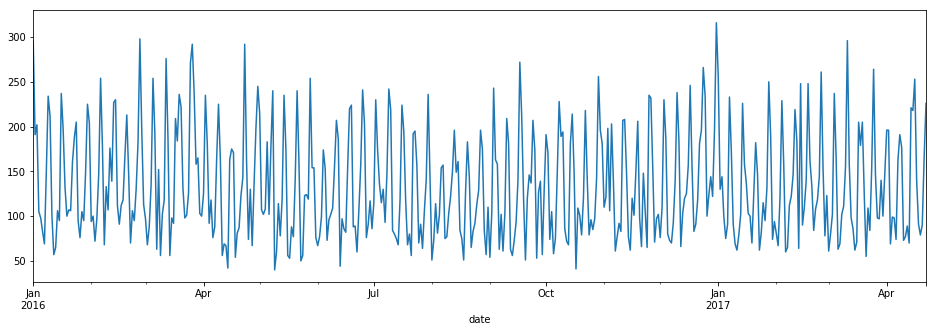

In [12]:
df1['total'].plot(figsize=(16, 5))

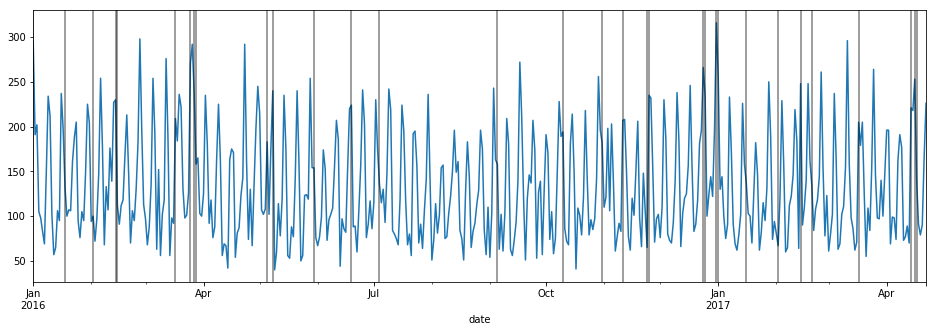

In [16]:
ax = df1['total'].plot(figsize=(16, 5))
for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.5)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

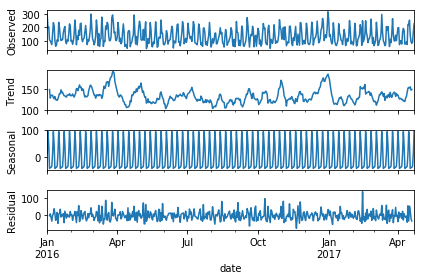

In [18]:
result = seasonal_decompose(df1['total'])
result.plot();

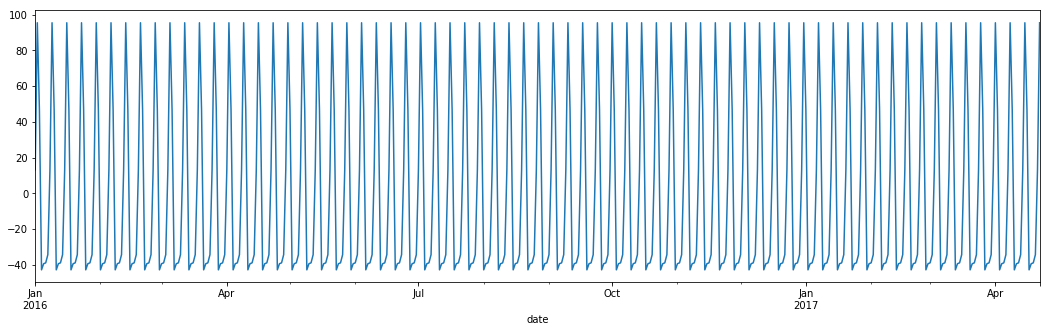

In [19]:
result.seasonal.plot(figsize=(18,5))

In [20]:
len(df1)

478

In [21]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [22]:
from pmdarima import auto_arima

In [23]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\U

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:                       y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1, 7)   Log Likelihood               -2386.975
Date:                 Fri, 03 Jan 2020   AIC                           4781.951
Time:                         10:52:49   BIC                           4798.629
Sample:                              0   HQIC                          4788.508
                                 - 478                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3862      1.715      2.557      0.011       1.024       7.748
ar.S.L7        0.9614      0.014     68.836      0.000       0.934       0.989
ma.S.L7       -0.7382      0.053    -13.893      0.000      -0.842      -0.634
sigma2      1330.2241     85.825     15.499      0.000    1162.010    1498.438
===================================================================================
Ljung-Box (Q):                       67.26   Jarque-Bera (JB):                66.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
# enforce invertibility to False
# https://stats.stackexchange.com/questions/50682/what-is-the-intuition-of-invertible-process-in-time-series
model = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

In [27]:
results = model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Fri, 03 Jan 2020   AIC                           4457.403
Time:                                   11:13:26   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start = len(train)
end = len(train) + len(test) - 1

In [31]:
predictions = results.predict(start, end).rename('SARIMA Model')

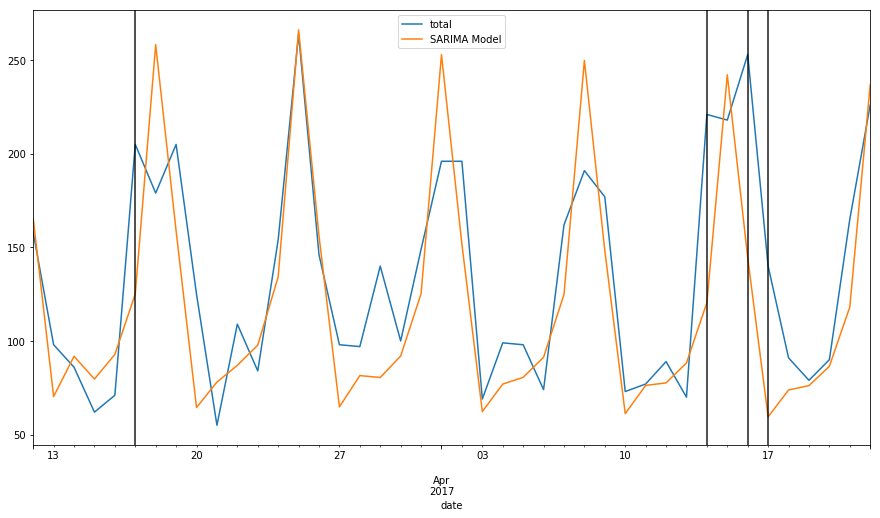

In [35]:
ax = test['total'].plot(legend=True, figsize=(15, 8))
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.9)

In [36]:
from statsmodels.tools.eval_measures import rmse

In [37]:
rmse(test['total'], predictions)

41.263154954198555

In [38]:
test['total'].mean()

134.26190476190476

# Lets add the Exogenous Variable

There is something IMPORTANT to note here: **We need to know the future of this exogenous variable**

Why? Let's review the actual forecasting process for basic SARIMA:
- We first re-train on all our data
- We set the future date span
- We forecast values

For SARIMAX, we need to provide more information for the future dates
- We need to provide the known exogenous variable into the future
- We can not also predict this exogenous variables, because then we are attempting to predict 2 things at once

In [39]:
# Exogenous wants a dataframe of all exogenous variables
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\U

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2369.544
Date:                           Fri, 03 Jan 2020   AIC                           4751.088
Time:                                   12:03:40   BIC                           4776.106
Sample:                               01-01-2016   HQIC                          4760.924
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.4592      2.584      4.821      0.000       7.394      17.525
holiday       38.6045      4.326      8.924      0.000      30.126      47.083
ar.L1          0.3241      0.043      7.600      0.000       0.241       0.408
ar.S.L7        0.8788      0.023     37.474      0.000       0.833       0.925
ma.S.L7       -0.2989      0.053     -5.637      0.000      -0.403      -0.195
sigma2      1138.2043     82.342     13.823      0.000     976.818    1299.591
===================================================================================
Ljung-Box (Q):                       87.91   Jarque-Bera (JB):                 6.70
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.92   Skew:                             0.26
Prob(H) (two-sided):                  0.61   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train our SARIMAX

In [47]:
model = SARIMAX(train['total'], exog=train[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), 
                enforce_invertibility=False)

In [48]:
result = model.fit()

In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 7)   Log Likelihood               -2089.208
Date:                           Fri, 03 Jan 2020   AIC                           4188.417
Time:                                   12:08:45   BIC                           4208.805
Sample:                               01-01-2016   HQIC                          4196.463
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9350      3.773     18.271      0.000      61.540      76.330
ar.L1          0.2101      0.044      4.762      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3163     44.866     17.370      0.000     691.380     867.253
===================================================================================
Ljung-Box (Q):                       36.17   Jarque-Bera (JB):                20.47
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
start = len(train)
end = len(train) + len(test) - 1

In [51]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

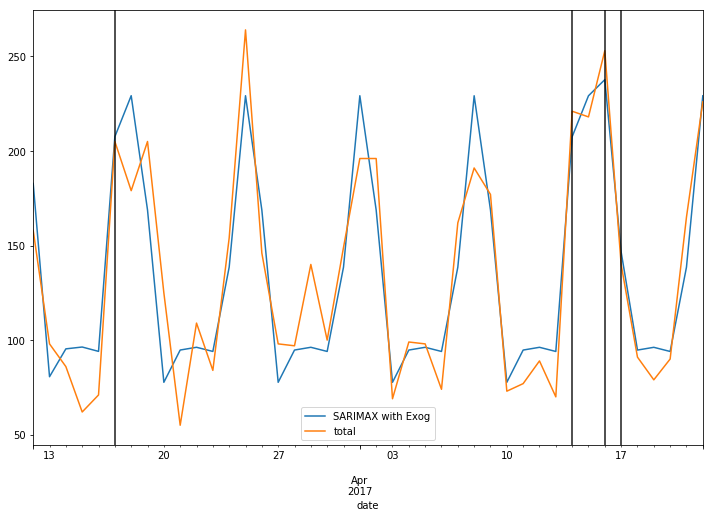

In [52]:
predictions.plot(figsize=(12, 8), legend=True)
ax = test['total'].plot(figsize=(12, 8), legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.9)

In [53]:
rmse(test['total'], predictions)

22.929756777897378

We've reduced our RMSE in half

# Forecast

In [54]:
model = SARIMAX(df1['total'], exog=df1[['holiday']], order=(1, 0, 0), seasonal_order=(1, 0, 1, 7), 
                enforce_invertibility=False)

In [55]:
results = model.fit()

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [58]:
exog_forecast = df[478:][['holiday']]

In [60]:
fcast = results.predict(len(df1), len(df1)+38, exog=exog_forecast).rename('FINAL SARIMAX FORECAST')

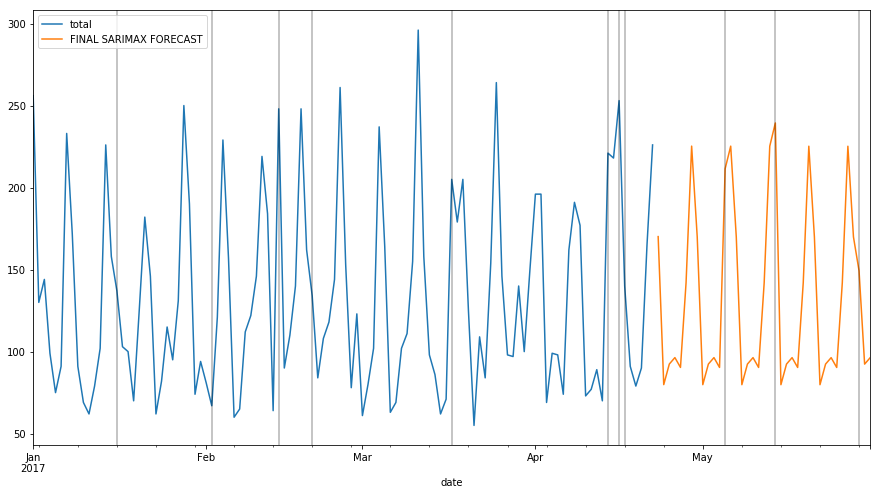

In [65]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(15, 8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='k', alpha=0.3)